In [1]:
from dpks.quant_matrix import QuantMatrix
from dpks.classification import Classifier

/home/erikh/dpks/test-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv")



In [3]:
quantified_data = (
qm.filter()
    .normalize(
        method="mean",
        log_transform=True,
        use_rt_sliding_window_filter=True,
        minimum_data_points=100,
        stride=5,
        use_overlapping_windows=True,
        rt_unit="minutes"
    )
    .quantify(method="top_n", top_n=1)
)


Mean of empty slice


In [4]:
clf = Classifier(quantitative_data = quantified_data, classifier='xgboost')
clf.cross_validation(k_folds=3)

1.00 accuracy with a standard deviation of 0.00


In [5]:
clf.interpret(algorithm = 'tree')

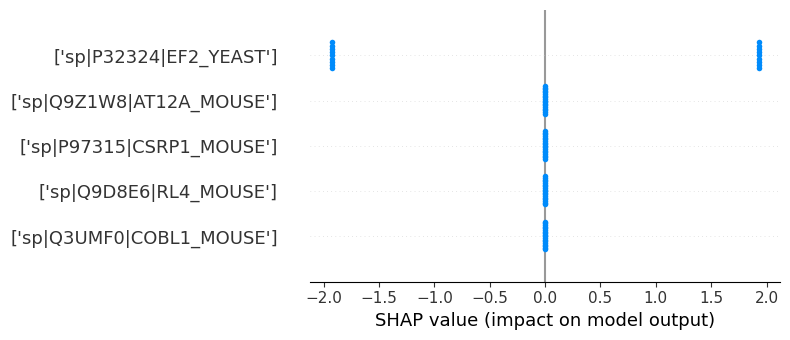

In [6]:
import shap

shap.summary_plot(clf.shap_values, max_display=5, feature_names = quantified_data.quantitative_data.obs.values)

In [7]:
from sklearn.svm import SVC
svm_clf = SVC()
clf = Classifier(quantitative_data = quantified_data, classifier=svm_clf)
clf.cross_validation(k_folds=2)
clf.clf

1.00 accuracy with a standard deviation of 0.00


SVC()